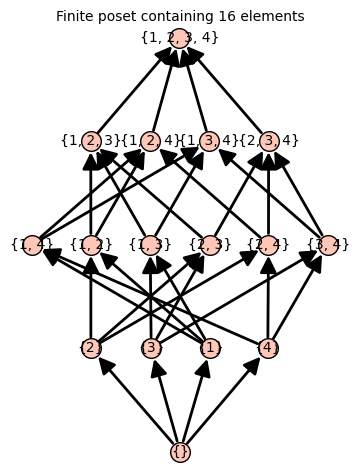

In [28]:
##creating our level poset of the subset relations -- extended boolean posets 

def level_poset(n):
    elements = Subsets(range(1, n + 1))
    ord = lambda x, y: x.issubset(y)
    level = lambda x: x.size()
    l_poset = Poset((elements,ord), facade=True)
    return l_poset
    
level_poset(4)

In [50]:
##ok, now generate the rhizome count for each level
def elements_in_level(poset, level):
    
    return list(filter(lambda element: len(element) == level, poset))

# print(elements_in_level(level_poset(4), 2))

def rhizome_ct(n):
    poset = level_poset(n)
    rhizomes = []
    ## --> the count of elms in a level l in a poset of n is n choose l. 
    
    ##dynamic programming can help optimize this if it's too slow here. 
    ##iterate through levels
    for level in range(1, n):
        children_set = set([])
        child_level_size = binomial(n, level + 1)
        elms = elements_in_level(poset, level)
    ##iterate through the elms in a level in a random way
        ##--> do greedy in a bit to make more efficient. 
        i = 0
        while len(children_set) < child_level_size and i < n:
    ##generate their children using lower_covers_iterator()
            children = poset.lower_covers(elms[i])
    ##add to exclusive set that removes duplicates
            children_set.update(children)
            rhizomes.append(elms[i])
            i+=1
    ##once the children set size is equal to the size of the child level, ct parents
    return(rhizomes)
rhizome_ct(4)

[{2}, {3}, {1}, {4}, {1, 4}, {1, 2}, {1, 3}, {1, 2, 3}]